<a href="https://colab.research.google.com/github/jdelarosa91/autokeras-example/blob/master/AutoKeras_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoKeras: MNIST example

## Prerequisites

This notebook was written in Google Colab, so it is necessary to install the autokeras library to develop the model.

In [0]:
!pip install autokeras
!pip install graphviz

## Dataset
In this tutorial we have used the dataset called MNIST. This is obtained through the Keras libraries.

In the following code, I load the MNIST dataset. This dataset will have a shape of (60000, 28, 28). It means, there are 60,000 pictures with 28x28 pixels.

It is necesary to add another dimension for the color channel, so I reshape this narray adding a new dimension for the color channel.

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading MNIST data
x_train = x_train.reshape(x_train.shape + (1,)) # Adding a new dimension
x_test = x_test.reshape(x_test.shape + (1,)) # Adding a new dimension

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


## Development

First, the necessary libraries are imported:
* ImageClassifier: AutoKeras class for image classification

In [0]:
from autokeras.image.image_supervised import ImageClassifier
import os
from graphviz import Digraph
from autokeras.utils import pickle_from_file

To create the models, is necessary to create an object using __ImageClassifier__ class that it was previously import.  This class recives the following arguments:
* path (Default: None): A string of the path to the directory to save the classifier as well as intermediate results.
* cnn: CNN module from net_module.py.
* y_encoder( Default: OneHotEncoder): Label encoder, used in transform_y or inverse_transform_y for encode the label.
* verbose (Default: False): A boolean value indicating the verbosity mode which determines whether the search process will be printed to stdout.
* augment (Default: True): A boolean value indicating whether the data needs augmentation.
* searcher_args (Default: None): A dictionary containing the parameters for the searcher's \_\_init\_\_ function.
* resize_shape (Default: Median shape): resize image height and width

_For this tutorial, only path (for a later visualization) and verbose are set._

Once the class was create, we can call the __fit__ method. This method recives the following arguments:
* x: A numpy.ndarray instance containing the training data or the training data combined with the validation data.
* y: A numpy.ndarray instance containing the labels of the training data. or the label of the training data combined with the validation label.
* time_limit (Default: 24h): The time limit for the search in seconds. (optional, default = None, which turns into 24 hours in method)

_For this tutorial, it was set a 2h time_limit. It is important to set GPU enviroment in Google Colab_


In [0]:
clf = ImageClassifier(path="/home/automodels",verbose=True, augment=False)
clf.fit(x_train, y_train, time_limit=1 * 60 * 60)
clf.final_fit(x_train, y_train, x_test, y_test, retrain=True)
y = clf.evaluate(x_test, y_test)
print(y)

Saving Directory: /home/automodels
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   0.191643375903368    |         0.984          |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
Epoch-17, Current Metric - 0.99:  1

Text(0.5, 1.0, 'The predict number is : 7')

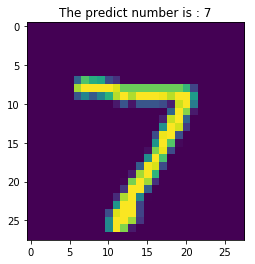

In [0]:
plt.imshow(np.squeeze(x_test[0]))
plt.title("The predict number is : " + str(clf.predict(x_test[0:1])[0]))

The algorithm automatically search for neural architectures and will train these architectures keeping the evaluation result of each generated architecture. 

With just a few lines of code, AutoKeras can choose the best neural architecture for the selected dataset.

## Results

The following code is taken from AutoKeras Github and allows to create pdfs with the neural architecture created using AutoKeras:

In [0]:
def to_pdf(graph, path):
    dot = Digraph(comment='The Round Table')

    for index, node in enumerate(graph.node_list):
        dot.node(str(index), str(node.shape))

    for u in range(graph.n_nodes):
        for v, layer_id in graph.adj_list[u]:
            dot.edge(str(u), str(v), str(graph.layer_list[layer_id]))

    dot.render(path)
    
def visualize(path):
    cnn_module = pickle_from_file(os.path.join(path, 'module'))
    cnn_module.searcher.path = path
    for item in cnn_module.searcher.history:
        model_id = item['model_id']
        graph = cnn_module.searcher.load_model_by_id(model_id)
        to_pdf(graph, os.path.join(path, str(model_id)))



Below are the opted neural architectures, which would allow future training

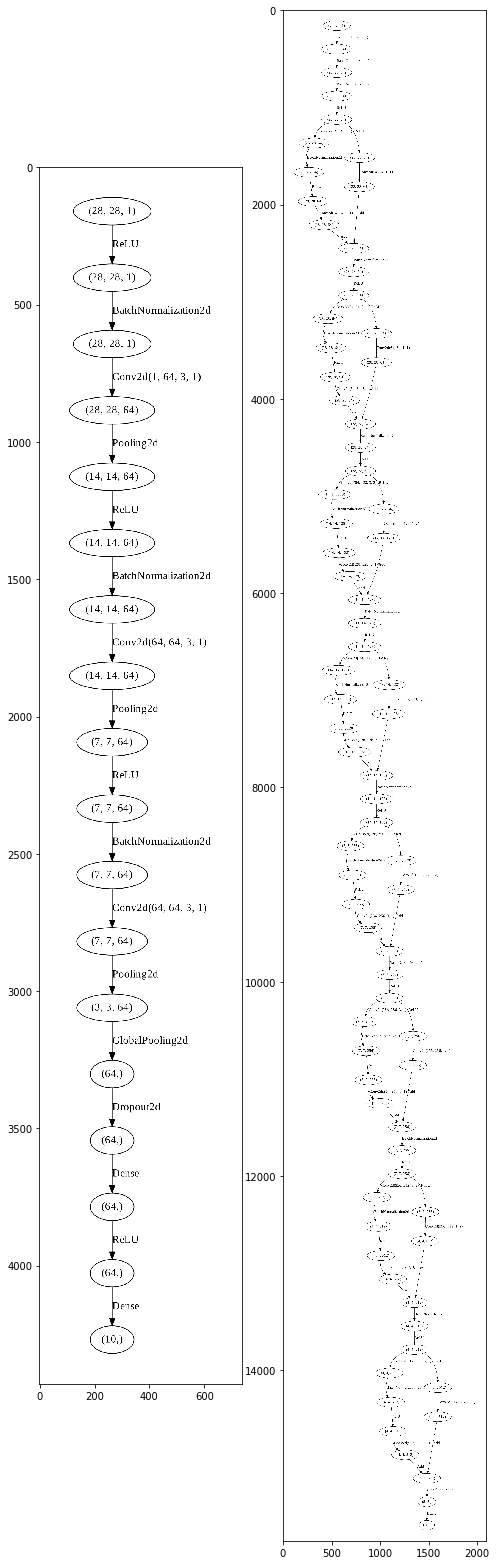

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread('/0-1.jpg')
img2=mpimg.imread('/1-1.jpg')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8, 40))
ax1.imshow(img1, cmap='Greys_r')
ax2.imshow(img2, cmap='Greys_r')

As can be seen in the previous image, the neural architectures selected for training are very complex and thanks of that we got very high accuracy (98.5%)

## Advantages and Disadvantages
### Advantages
* Good neural architectures are found
* Easy to develop saving development times
* No great knowledge of AI is necessary
* Seems it is using a EarlyStopping because it says the number of necessary epochs for each architecture

### Disadvantages
* It requires great computing capabilities because it uses very complex architectures
* It requires long execution times, because of complex architectures
* Although it seems that it uses an EarlyStopping strategy, for a choice of 5 epochs it executes trains superior to 30 epochs
* Although a limit time is set, execution doesn't finish until the training that are runing finish. The architectures are complex so in my tests it took more than 4 h for a 2h limit.

## References
* Jin, H., Song, Q., & Hu, X. (2019, July). Auto-keras: An efficient neural architecture search system. In Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (pp. 1946-1956). ACM.